In [40]:
import pandas as pd

df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Name,Pclass,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [47]:
X = df.drop(labels=['PassengerId','SibSp','Name','Parch','Ticket','Cabin','Embarked'], axis=1)

In [48]:
X.head()

,Pclass,Gender,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [49]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Gender    891 non-null    object 
 2   Age       714 non-null    float64
 3   Fare      891 non-null    float64
 4   Survived  891 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB


In [67]:
survived_data = X[X['Survived'] == 1]
survived = survived_data.count().values[1]
print(survived)

342


In [68]:
dead = X[X['Survived'] == 0]
dead = dead.count().values[1]
print(dead)

549


In [69]:
survived.shape

()

<AxesSubplot:ylabel='count'>

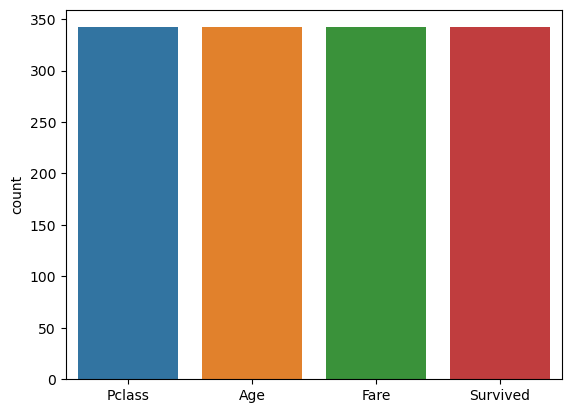

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['Pclass', 'Gender','Age','Fare','Survived']

survived_data1 = survived_data.astype('category')
sns.countplot(data = survived_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

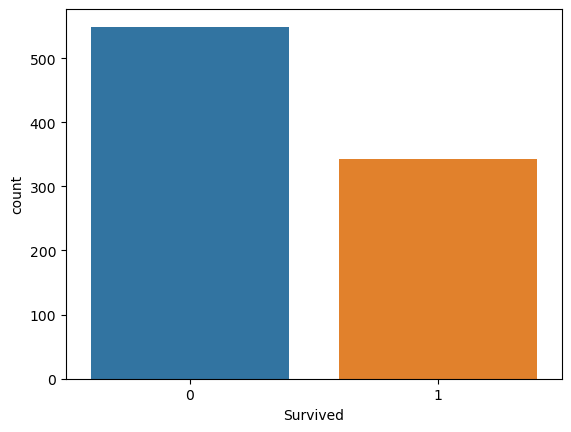

In [94]:
sns.countplot(x=X["Survived"])

In [98]:
rate = X.groupby(by='Gender')
rate.head()

,Pclass,Gender,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0
5,3,male,NaN,8.4583,0
6,1,male,54.0,51.8625,0
7,3,male,2.0,21.0750,0
8,3,female,27.0,11.1333,1
9,2,female,14.0,30.0708,1


In [104]:
surv=X.groupby(['Gender']).mean()
surv.head()

,Pclass,Age,Fare,Survived
Gender,,,,
female,2.159236,27.915709,44.479818,0.742038
male,2.389948,30.726645,25.523893,0.188908


In [145]:
pivot = pd.pivot_table(X,columns=['Gender','Pclass'])
p_drop = pivot_df.drop(labels=['Age','Fare'],axis=0)
print(p_drop)

Gender      female                     male                    
Pclass           1         2    3         1         2         3
Survived  0.968085  0.921053  0.5  0.368852  0.157407  0.135447


In [175]:
pivot.head()

Gender        female                            male                      
Pclass             1          2         3          1          2          3
Age        34.611765  28.722973  21.75000  41.281386  30.740707  26.507589
Fare      106.125798  21.970121  16.11881  67.226127  19.741782  12.661633
Survived    0.968085   0.921053   0.50000   0.368852   0.157407   0.135447

In [167]:
male_ = X[X['Gender'] == 'male']
survived_male = male_[male_['Survived']==1]
print(survived_male)

     Pclass Gender   Age     Fare  Survived
17        2   male   NaN  13.0000         1
21        2   male  34.0  13.0000         1
23        1   male  28.0  35.5000         1
36        3   male   NaN   7.2292         1
55        1   male   NaN  35.5000         1
..      ...    ...   ...      ...       ...
838       3   male  32.0  56.4958         1
839       1   male   NaN  29.7000         1
857       1   male  51.0  26.5500         1
869       3   male   4.0  11.1333         1
889       1   male  26.0  30.0000         1

[109 rows x 5 columns]


In [140]:
pivot_df= pd.DataFrame(pivot)
t_pv = pivot_df.transpose()

<AxesSubplot:>

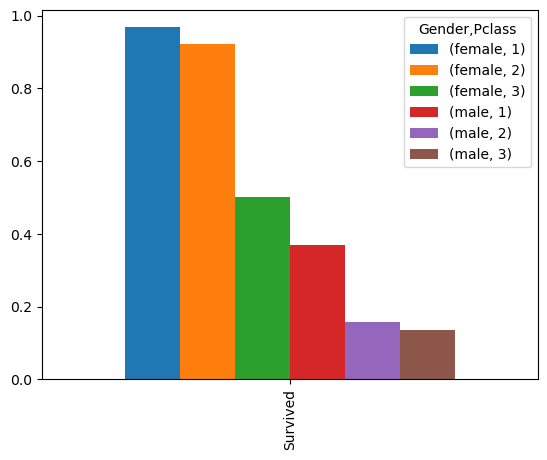

In [149]:
p_drop.plot(kind='bar',width=1)

In [164]:
s_df = survived_male.groupby('Pclass').count()
print(s_df)

        Gender  Age  Fare  Survived
Pclass                             
1           45   40    45        45
2           17   15    17        17
3           47   38    47        47


In [166]:
female_ = X[X['Gender'] == 'female']
survived_female = male_[male_['Survived']==1]
print(survived_female)

     Pclass  Gender   Age     Fare  Survived
1         1  female  38.0  71.2833         1
2         3  female  26.0   7.9250         1
3         1  female  35.0  53.1000         1
8         3  female  27.0  11.1333         1
9         2  female  14.0  30.0708         1
..      ...     ...   ...      ...       ...
874       2  female  28.0  24.0000         1
875       3  female  15.0   7.2250         1
879       1  female  56.0  83.1583         1
880       2  female  25.0  26.0000         1
887       1  female  19.0  30.0000         1

[233 rows x 5 columns]


In [169]:
s_f_df = survived_female.groupby('Pclass').count()
print(s_f_df)

        Gender  Age  Fare  Survived
Pclass                             
1           91   82    91        91
2           70   68    70        70
3           72   47    72        72


In [189]:
class_ = X.iloc[:,0]
print(class_)

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64


In [187]:
fare = X.iloc[:,3]
print(fare)

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64


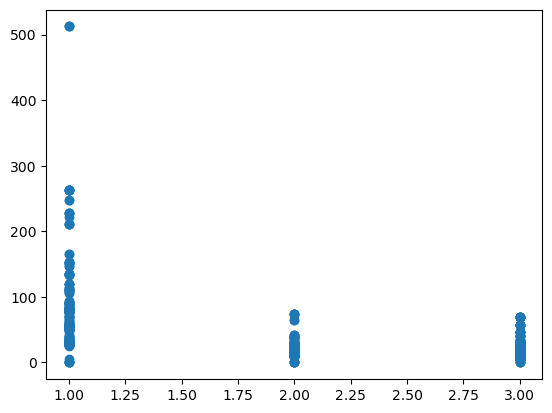

In [190]:
plt.scatter(class_,fare)

In [194]:
X.head()

,Pclass,Gender,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [219]:
x_train = X.drop('Survived',axis=1)
x_train.head()

,Pclass,Gender,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [220]:

x_train = pd.get_dummies(x_train)
x_train= x_train.drop(labels='Gender_female',axis=1)
print(x_train)

     Pclass   Age     Fare  Gender_male
0         3  22.0   7.2500            1
1         1  38.0  71.2833            0
2         3  26.0   7.9250            0
3         1  35.0  53.1000            0
4         3  35.0   8.0500            1
..      ...   ...      ...          ...
886       2  27.0  13.0000            1
887       1  19.0  30.0000            0
888       3   NaN  23.4500            0
889       1  26.0  30.0000            1
890       3  32.0   7.7500            1

[891 rows x 4 columns]


In [221]:
x_train.head()

,Pclass,Age,Fare,Gender_male
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1


In [222]:
x_train.describe()

,Pclass,Age,Fare,Gender_male
count,891.000000,714.000000,891.000000,891.000000
mean,2.308642,29.699118,32.204208,0.647587
std,0.836071,14.526497,49.693429,0.477990
min,1.000000,0.420000,0.000000,0.000000
25%,2.000000,20.125000,7.910400,0.000000
50%,3.000000,28.000000,14.454200,1.000000
75%,3.000000,38.000000,31.000000,1.000000
max,3.000000,80.000000,512.329200,1.000000


In [245]:
x_train.isnull().sum()

Pclass           0
Age            177
Fare             0
Gender_male      0
dtype: int64

In [244]:
x_train['Age'].mean()

29.69911764705882

In [251]:
x_t = x_train.fillna(value=x_train['Age'].mean())
x_t.head(10)

,Pclass,Age,Fare,Gender_male
0,3,22.000000,7.2500,1
1,1,38.000000,71.2833,0
2,3,26.000000,7.9250,0
3,1,35.000000,53.1000,0
4,3,35.000000,8.0500,1
5,3,29.699118,8.4583,1
6,1,54.000000,51.8625,1
7,3,2.000000,21.0750,1
8,3,27.000000,11.1333,0
9,2,14.000000,30.0708,0


<AxesSubplot:>

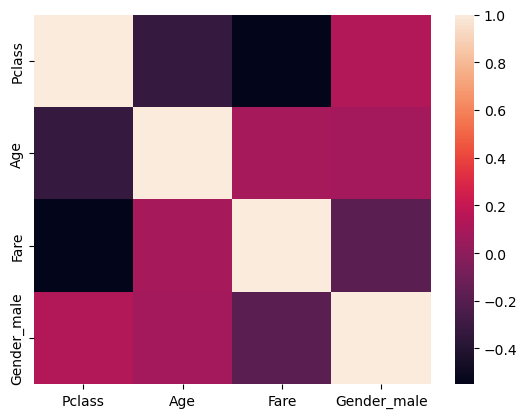

In [254]:
sns.heatmap(x_t.corr())

<AxesSubplot:xlabel='Age', ylabel='Count'>

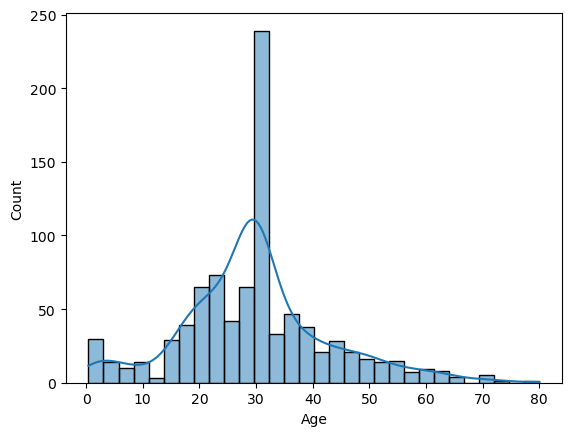

In [266]:
sns.histplot(x_t['Age'],kde='True')

<AxesSubplot:xlabel='Fare', ylabel='Count'>

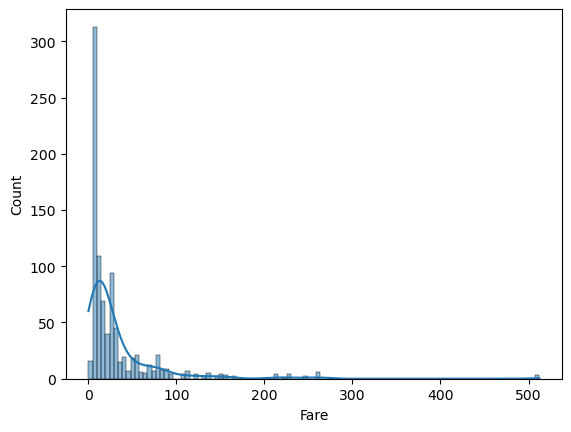

In [264]:
sns.histplot(x_t['Fare'],kde='True')

In [268]:
y = X['Survived']
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [302]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x_t,y,test_size=0.2,random_state=100)

In [303]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

In [304]:
model.fit(X_train, y_train)

GaussianNB()

In [305]:
print(X_test[0:10])

     Pclass        Age      Fare  Gender_male
205       3   2.000000   10.4625            0
44        3  19.000000    7.8792            0
821       3  27.000000    8.6625            1
458       2  50.000000   10.5000            0
795       2  39.000000   13.0000            1
118       1  24.000000  247.5208            1
424       3  18.000000   20.2125            1
678       3  43.000000   46.9000            0
269       1  35.000000  135.6333            0
229       3  29.699118   25.4667            0


In [311]:
y_predi = model.predict(X_test[0:10])
print(y_predi)

[1 1 0 1 0 1 0 1 1 1]


In [312]:
prob= model.predict_proba(X_test[0:10])
print(prob)

[[3.02762468e-01 6.97237532e-01]
 [4.10659747e-01 5.89340253e-01]
 [9.67928072e-01 3.20719276e-02]
 [2.71109150e-01 7.28890850e-01]
 [9.36395361e-01 6.36046393e-02]
 [2.03519972e-09 9.99999998e-01]
 [9.63091782e-01 3.69082175e-02]
 [3.74615313e-01 6.25384687e-01]
 [3.73730543e-04 9.99626269e-01]
 [4.46853974e-01 5.53146026e-01]]


In [307]:
y_pred = model.predict(X_test)


In [309]:
print(y_test[0:10])

205    0
44     1
821    1
458    1
795    0
118    0
424    0
678    0
269    1
229    0
Name: Survived, dtype: int64


In [310]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print(acc)

0.776536312849162


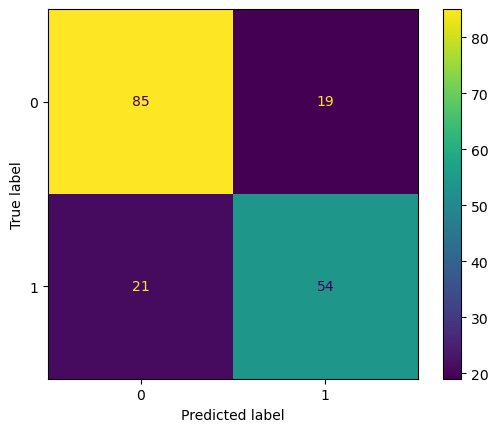

In [299]:
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

In [314]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       104
           1       0.74      0.72      0.73        75

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [322]:
x_t['Age'].head(10)

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: Age, dtype: float64

In [ ]:
x_t['Age'] = pd.cut(x_t['Age'],bins=3)

In [327]:
x_t.head(10)

,Pclass,Age,Fare,Gender_male
0,3,"(0.34, 26.947]",7.2500,1
1,1,"(26.947, 53.473]",71.2833,0
2,3,"(0.34, 26.947]",7.9250,0
3,1,"(26.947, 53.473]",53.1000,0
4,3,"(26.947, 53.473]",8.0500,1
5,3,"(26.947, 53.473]",8.4583,1
6,1,"(53.473, 80.0]",51.8625,1
7,3,"(0.34, 26.947]",21.0750,1
8,3,"(26.947, 53.473]",11.1333,0
9,2,"(0.34, 26.947]",30.0708,0


In [328]:
x_t['Fare'] = pd.cut(x_t['Fare'],bins=3)

In [329]:
x_t.head()

,Pclass,Age,Fare,Gender_male
0,3,"(0.34, 26.947]","(-0.512, 170.776]",1
1,1,"(26.947, 53.473]","(-0.512, 170.776]",0
2,3,"(0.34, 26.947]","(-0.512, 170.776]",0
3,1,"(26.947, 53.473]","(-0.512, 170.776]",0
4,3,"(26.947, 53.473]","(-0.512, 170.776]",1


In [336]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(x_t,y,test_size=0.2,random_state=100)

In [339]:
from sklearn.naive_bayes import CategoricalNB

model = CategoricalNB()

In [340]:
model.fit(X_train1, y_train1)

TypeError: int() argument must be a string, a bytes-like object or a number, not 'pandas._libs.interval.Interval'

In [ ]:
# hybrid naive bayes for 90%
# merge multiple data containing text, numerical, categorical
# 